# Used Car Price Prediction Using Random Forest and Machine Learning Techniques

### Importing dependencies

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

### Downloading the dataset from Kaggle

In [ ]:
import kagglehub

path = kagglehub.dataset_download("amanrajput16/used-car-price-data-from-cars24")

print("Path to dataset files:", path)

### loading the dataset

In [3]:
df = pd.read_csv(path+"/cars24data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine capacity     1445 non-null   int64 
 4   Spare key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


In [5]:
df.shape

(1445, 11)

In [6]:
df.head(5)

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2


In [7]:
df.describe()

,Price,Manufacturing_year,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts
count,1.445000e+03,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,5.263543e+05,2017.817301,1142.104498,50588.903114,1.285121,9.597232,3.228374
std,1.963696e+05,2.986554,169.020818,27339.562631,0.489877,8.398637,3.364578
min,1.390000e+05,2010.000000,796.000000,1207.000000,1.000000,0.000000,0.000000
25%,3.900000e+05,2016.000000,998.000000,28803.000000,1.000000,3.000000,0.000000
50%,5.010000e+05,2018.000000,1197.000000,47849.000000,1.000000,8.000000,2.000000
75%,6.310000e+05,2020.000000,1197.000000,70337.000000,2.000000,14.000000,5.000000
max,1.599000e+06,2023.000000,1462.000000,124716.000000,3.000000,43.000000,27.000000


### Heatmap

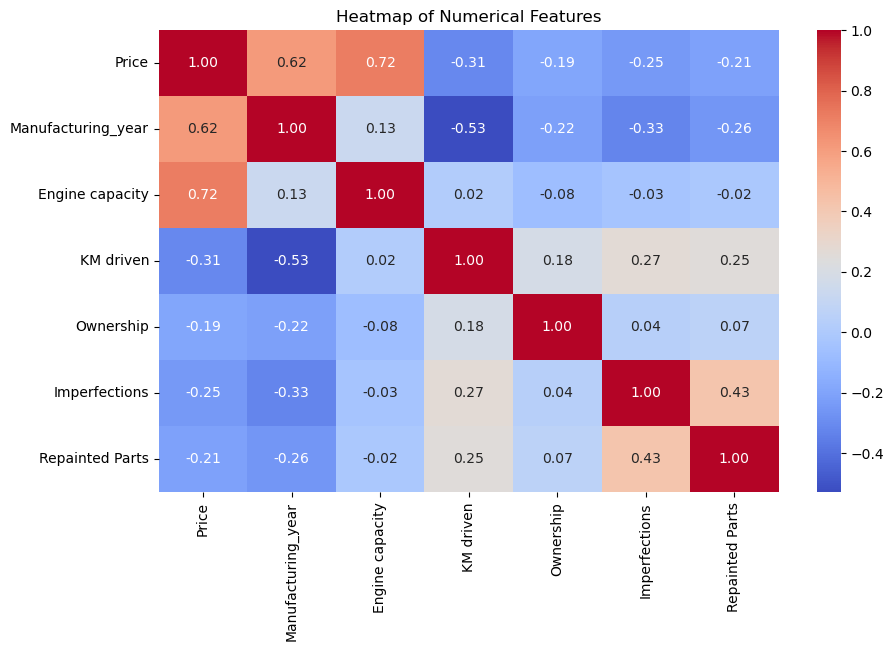

In [8]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Numerical Features")
plt.show()

In [9]:
print("max price =",df['Price'].max()," \nmin price =",df['Price'].min())
print("max Imperfections =",df['Imperfections'].max(),"\nmin Imperfections =",df['Imperfections'].min())
print("max Repainted Parts =",df['Repainted Parts'].max(),"\nmin Repainted Parts =",df['Repainted Parts'].min())

max price = 1599000  
min price = 139000
max Imperfections = 43 
min Imperfections = 0
max Repainted Parts = 27 
min Repainted Parts = 0


### Data cleaning

In [10]:
df.columns

Index(['Model Name', 'Price', 'Manufacturing_year', 'Engine capacity',
       'Spare key', 'Transmission', 'KM driven', 'Ownership', 'Fuel type',
       'Imperfections', 'Repainted Parts'],
      dtype='object')

In [11]:
df.head(2)


,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1


In [12]:
df['Model Name'].nunique()

573

In [13]:
df['Model Name']=df['Model Name'].apply(lambda x: x[12:])

### This lambda function  extracts a substring starting from the 12th character onward.

In [14]:
df['Model Name'] = df['Model Name'].apply(lambda x: "Wagon R" if "new wagon-r" in x.lower() else x)

### replacing any model name  "new wagon-r" with "Wagon R"


In [15]:
df.sample(3)

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
1212,Celerio VXI AMT,372000,2014,998,Yes,Automatic,71320,1,Petrol,0,0
807,Dzire ZXI AMT,622000,2019,1197,Yes,Automatic,80139,1,Petrol,17,7
1266,Eeco 5 STR WITH A/C+HTR,445000,2018,1196,No,Manual,66374,1,Petrol,8,0


In [16]:
df['Model Name'] = df['Model Name'].apply(lambda x: x.split()[0])  

### extracting the first word from each entry from the model name

In [17]:
df.sample(10)

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
76,Alto,219000,2013,796,No,Manual,56113,2,Petrol,15,9
1181,IGNIS,543000,2017,1197,No,Automatic,68890,1,Petrol,10,7
1214,Wagon,358000,2013,998,No,Manual,40896,1,Petrol,10,5
134,IGNIS,538000,2017,1197,Yes,Automatic,39347,1,Petrol,5,4
1180,Dzire,849000,2022,1197,No,Automatic,24567,1,Petrol,3,0
277,Ertiga,586000,2014,1373,Yes,Manual,62157,2,CNG,16,6
927,Baleno,590000,2017,1197,Yes,Automatic,49352,1,Petrol,19,0
1340,Wagon,318000,2016,998,Yes,Manual,73723,2,Petrol,26,15
316,Baleno,708000,2019,1197,Yes,Automatic,24684,1,Petrol,3,0
451,Alto,234000,2014,998,No,Manual,53066,1,Petrol,13,4


In [18]:
df['Imperfections'].max()

43

In [19]:
print("Number of unique values in Model Name attribute", df['Model Name'].nunique())
df['Model Name'].unique()

Number of unique values in Model Name attribute 20


array(['Swift', 'Baleno', 'Ertiga', 'Dzire', 'Alto', 'S', 'Celerio',
       'IGNIS', 'Wagon', 'Ciaz', 'Vitara', 'BREZZA', 'XL6', 'Ritz',
       'Eeco', 'Grand', 'OMNI', 'Zen', 'A', 'Omni'], dtype=object)

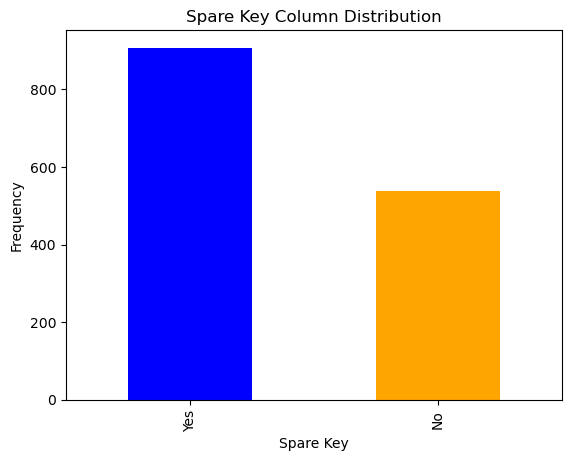

In [20]:
df["Spare key"].value_counts().plot(kind="bar", color=['blue', 'orange'])
plt.xlabel("Spare Key")
plt.ylabel("Frequency")
plt.title("Spare Key Column Distribution")
plt.show()


### Removing the Spare Key column since it has minimal impact on the dataset or other features.

In [21]:
df.drop(columns=['Spare key'], inplace=True)
df.columns


Index(['Model Name', 'Price', 'Manufacturing_year', 'Engine capacity',
       'Transmission', 'KM driven', 'Ownership', 'Fuel type', 'Imperfections',
       'Repainted Parts'],
      dtype='object')

### Checking Outlier

In [22]:
print("\nOutlier Checking with IQR Method :\n")
for col in df.select_dtypes(include=['number']):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    if outlier_count > 0:
        print(f"{col}: {outlier_count} outliers.")
    else:
        print(f"{col}: No outliers.")


Outlier Checking with IQR Method :

Price: 46 outliers.
Manufacturing_year: No outliers.
Engine capacity: No outliers.
KM driven: No outliers.
Ownership: No outliers.
Imperfections: 36 outliers.
Repainted Parts: 23 outliers.


### There are some outliers in the dataset, particularly in the 'Price' and 'Imperfections' columns. However, we are not modifying them, as they are essential for the model's learning process.

In [23]:
df.head(5)

,Model Name,Price,Manufacturing_year,Engine capacity,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,Swift,561000,2017,1197,Manual,25847,2,Petrol,6,2
1,Baleno,498000,2016,1197,Manual,55511,2,Petrol,12,1
2,Swift,577000,2020,1197,Manual,47110,1,Petrol,4,2
3,Ertiga,1084000,2022,1462,Automatic,35378,1,Petrol,2,3
4,Dzire,603000,2019,1197,Manual,91856,1,Petrol,3,2


### EDA

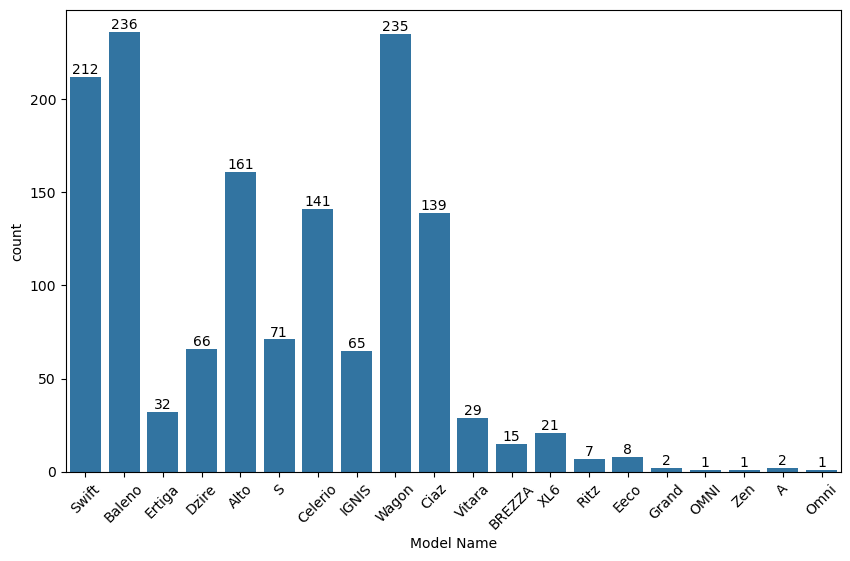

In [24]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='Model Name', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.show()

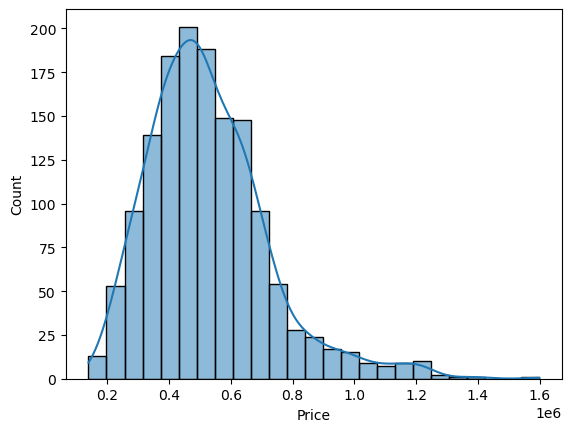

In [25]:
sns.histplot(df['Price'], bins=25, kde=True)
plt.show()

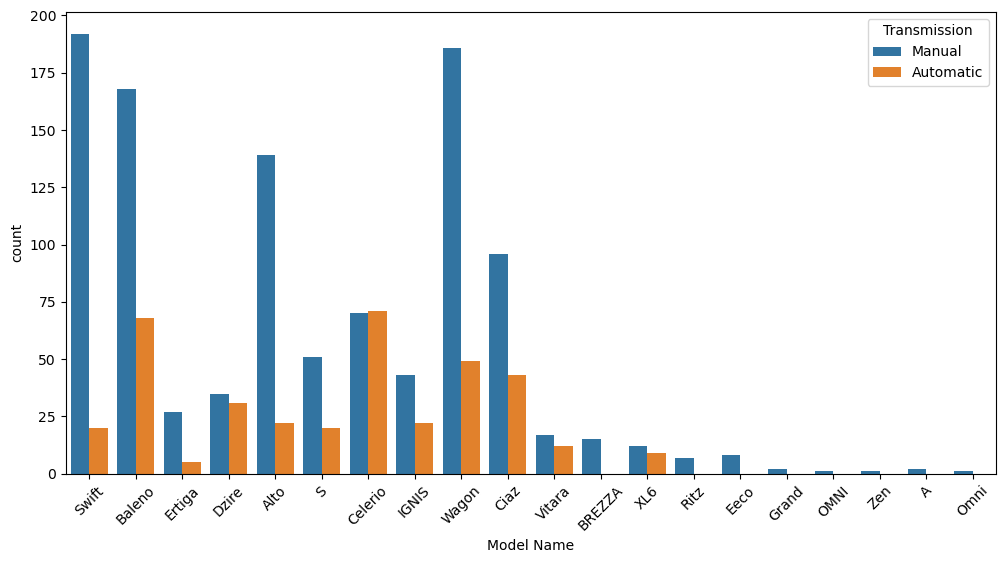

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Model Name", hue="Transmission", data=df)
plt.xticks(rotation=45)
plt.show()

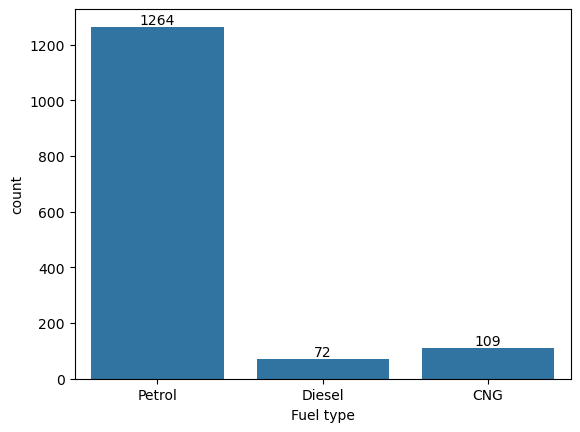

In [27]:
ax=sns.countplot(x="Fuel type", data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

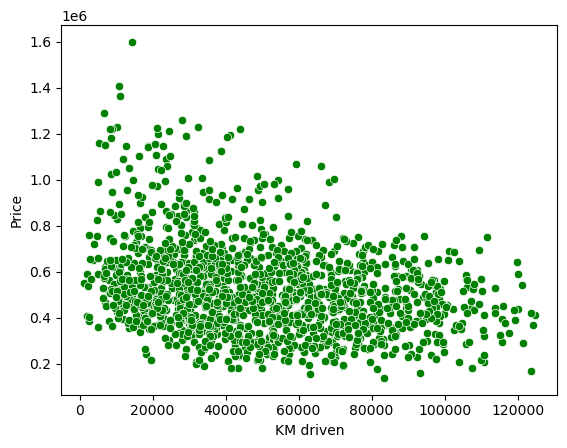

In [28]:
sns.scatterplot(x="KM driven", y="Price", data=df, color='green')
plt.show()


### Negative correlation between kilometers driven and car price, meaning higher mileage generally leads to lower value

In [29]:
print("max - ",df['Ownership'].min())
print("min - ",df['Ownership'].max())

max -  1
min -  3


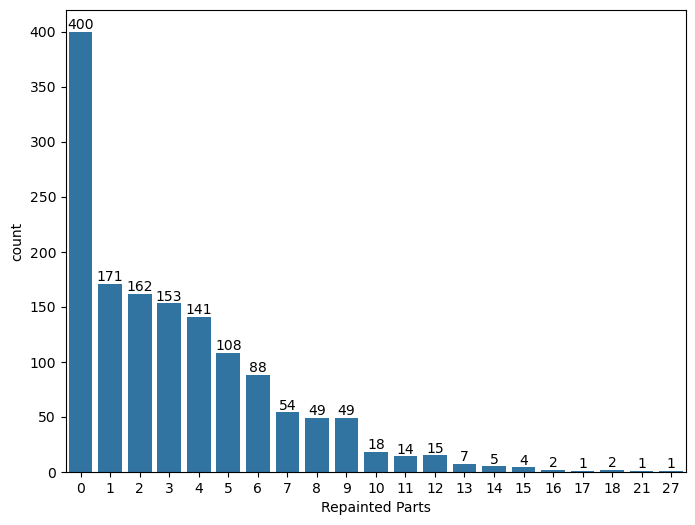

In [30]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(x="Repainted Parts", data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

## Encoding

In [31]:
df.head(2)

,Model Name,Price,Manufacturing_year,Engine capacity,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,Swift,561000,2017,1197,Manual,25847,2,Petrol,6,2
1,Baleno,498000,2016,1197,Manual,55511,2,Petrol,12,1


In [32]:
object_cols=[]
for cols in df.select_dtypes(include=['object']).columns:
    object_cols.append(cols)

object_cols

['Model Name', 'Transmission', 'Fuel type']

### Using label encoder for 'Model Name', 'Transmission', 'Fuel type

In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for cols in object_cols:
    df[cols] = encoder.fit_transform(df[cols])
    

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Model Name          1445 non-null   int32
 1   Price               1445 non-null   int64
 2   Manufacturing_year  1445 non-null   int64
 3   Engine capacity     1445 non-null   int64
 4   Transmission        1445 non-null   int32
 5   KM driven           1445 non-null   int64
 6   Ownership           1445 non-null   int64
 7   Fuel type           1445 non-null   int32
 8   Imperfections       1445 non-null   int64
 9   Repainted Parts     1445 non-null   int64
dtypes: int32(3), int64(7)
memory usage: 96.1 KB


### Removing the target variable "Price" from the dataset and storing it in `y`.

In [35]:
X=df.drop(columns=['Price'])
y = df[['Price']]


### Scaling both X and y to standardize their feature values this will improve model performance.

In [36]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

print("X shape:", X_scaled.shape)
print("y shape:", y_scaled.shape)   

X shape: (1445, 9)
y shape: (1445, 1)


## Train Test split

In [37]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

In [38]:
X_scaled

array([[ 1.01956221, -0.27375494,  0.32489789, ...,  0.3597118 ,
        -0.42845964, -0.36521636],
       [-0.94544932, -0.60870488,  0.32489789, ...,  0.3597118 ,
         0.28618928, -0.66253335],
       [ 1.01956221,  0.7310949 ,  0.32489789, ...,  0.3597118 ,
        -0.66667595, -0.36521636],
       ...,
       [-0.94544932,  0.39614495,  0.32489789, ...,  0.3597118 ,
         1.71548712,  0.2294176 ],
       [-0.6179474 , -0.27375494,  1.36655023, ...,  0.3597118 ,
        -0.66667595,  0.52673459],
       [ 1.34706414, -1.94850467, -0.85287948, ...,  0.3597118 ,
         1.23905451,  1.71600252]])

In [39]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1011, 9)
X_test shape: (434, 9)
y_train shape: (1011, 1)
y_test shape: (434, 1)


### Training The Models

### Lets try and test our first model LinearRegression

In [40]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

### Predictions

In [41]:
linear_model_pred = linear_model.predict(X_test)

### Scores

In [42]:
# Evaluate model performance
print("Linear Model Scores:")
print("R² score:", r2_score(y_test, linear_model_pred))
print("Mean Squared Error:", mean_squared_error(y_test, linear_model_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, linear_model_pred))


Linear Model Scores:
R² score: 0.8204066990620049
Mean Squared Error: 0.17527770658441466
Mean Absolute Error: 0.31582835585893526


## Actual vs Predicted Values

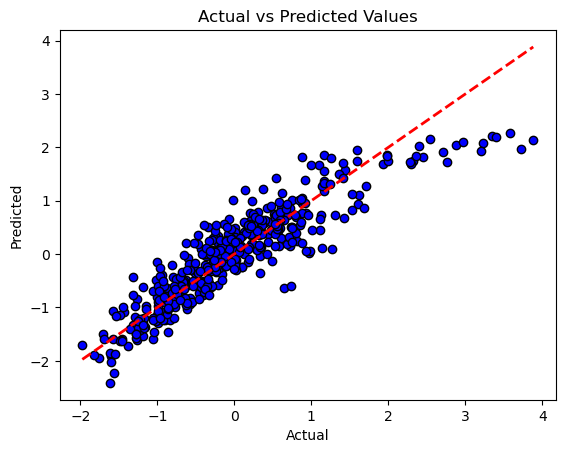

In [43]:
import matplotlib.pyplot as plt

plt.scatter(y_test, linear_model_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


## The linear regression model achieving 82% accuracy is impressive, but let's explore L1 (Lasso) and L2 (Ridge) regression to see if they yield even better performance.


In [44]:
from sklearn.linear_model import Lasso

# Initialize Lasso model with alpha (regularization strength)
lasso_model = Lasso(alpha=0.1)

# Fit the model
lasso_model.fit(X_train, y_train)

# Predict
lasso_pred = lasso_model.predict(X_test)

In [45]:
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)

# results
print(f'R² Score: {lasso_r2:.4f}')
print(f'Mean Squared Error: {lasso_mse:.4f}')
print(f'Mean Absolute Error: {lasso_mae:.4f}')


R² Score: 0.7904
Mean Squared Error: 0.2046
Mean Absolute Error: 0.3233


### The model achieved an R² Score of 0.7904, The model's performance is lower than linear regression, so let's try Ridge regression for potential improvements.


In [46]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict
ridge_pred = ridge_model.predict(X_test)

In [47]:
# Calculate evaluation metrics
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

# Print results
print(f'R² Score: {ridge_r2:.4f}')
print(f'Mean Squared Error: {ridge_mse:.4f}')
print(f'Mean Absolute Error: {ridge_mae:.4f}')


R² Score: 0.8204
Mean Squared Error: 0.1753
Mean Absolute Error: 0.3158


### The model achieved an R² Score of 0.8204, Showing improved predictive accuracy, with a Mean Squared Error of 0.1753 and a Mean Absolute Error of 0.3158, reflecting more precise predictions


### lets go to one step further and try random forest

# Random Forest Regressor

In [48]:
# import necessary librarie
from sklearn.ensemble import RandomForestRegressor

In [49]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train.ravel())

RandomForestRegressor()

In [50]:
# Predicting on the test set
rf_model_pred=rf_model.predict(X_test)

In [51]:
print("Random Forest Regressor Model Scores:")
print("R2 score:", r2_score(y_test, rf_model_pred))
print("Mean squared error:", mean_squared_error(y_test, rf_model_pred))
print("Mean absolute error:", mean_absolute_error(y_test, rf_model_pred))

Random Forest Regressor Model Scores:
R2 score: 0.8844559273762567
Mean squared error: 0.11276756957602174
Mean absolute error: 0.23163903905972402


### The Random Forest model significantly improves performance, achieving an R² score of 0.8871, indicating stronger predictive accuracy compared to previous models. The Mean Squared Error of 0.1102 and Mean Absolute Error of 0.2319 suggest reduced error margins

### Actual vs Predicted Values

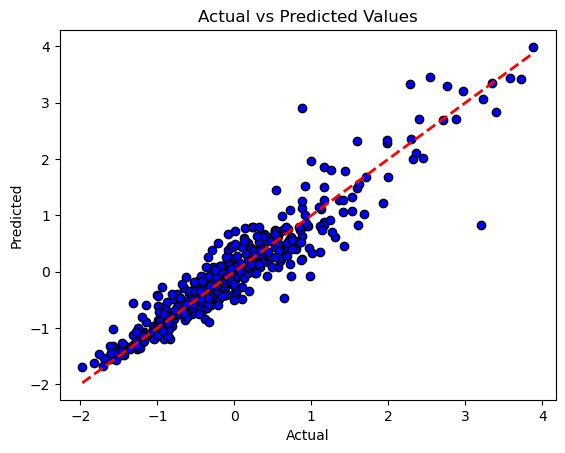

In [52]:
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_model_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


## Let's run GridSearchCV to fine-tune hyperparameters and see if we can achieve further improvements in model performance.

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train.ravel())

# Best parameters
print("Best parameters:", grid_search.best_params_)
print("Best R² score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best R² score: 0.9071568918815182


In [54]:
rf_model_pred_2 = grid_search.best_estimator_.predict(X_test)

In [55]:
print("Random Forest Regressor Model after grid search Scores:")
print("R2 score:", r2_score(y_test, rf_model_pred_2))
print("Mean squared error:", mean_squared_error(y_test, rf_model_pred_2))
print("Mean absolute error:", mean_absolute_error(y_test, rf_model_pred_2))

Random Forest Regressor Model after grid search Scores:
R2 score: 0.8863280240354723
Mean squared error: 0.11094045905899341
Mean absolute error: 0.23249881098178501


### The Random Forest model significantly improves performance, achieving an R² score of 0.8871, indicating stronger predictive accuracy compared to previous models. The Mean Squared Error of 0.1102 and Mean Absolute Error of 0.2319 suggest reduced error margins, meaning the model captures complex patterns better. 


### Actual vs Predicted Values

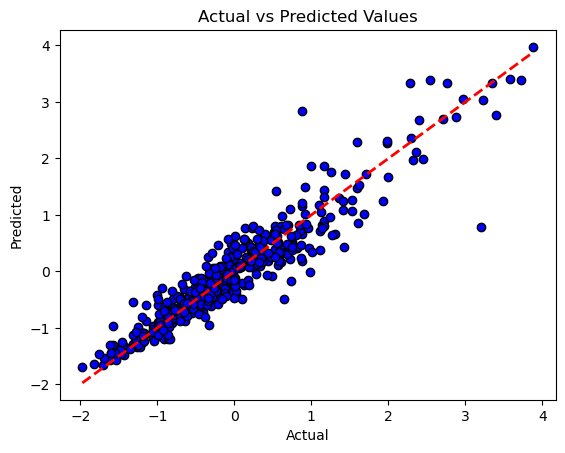

In [56]:
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_model_pred_2, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


### Feature Importances from Random Forest model

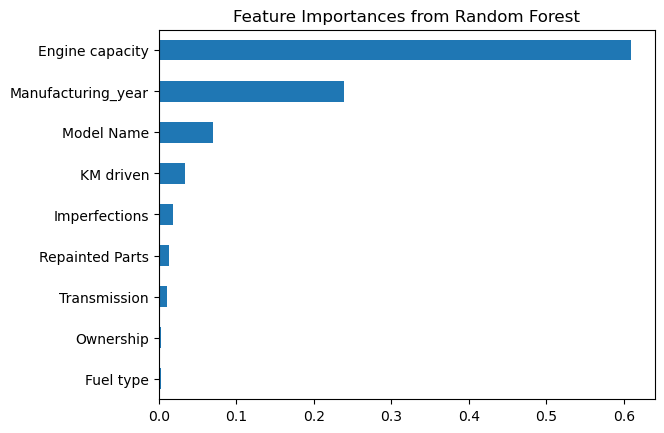

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances from Random Forest')
plt.show()


### The Random Forest model delivers strong predictions with reduced errors, making it a reliable choice. Fine-tuning and ensemble methods could further improve accuracy, but overall, it shows great potential for price prediction.

# saving the model using joblib another way to save model is pickle


In [58]:
from joblib import dump

dump(rf_model, "rf_model.joblib")  
from joblib import load

model = load("rf_model.joblib")

### Thank you for your interest – Om Gaikwad.